In [17]:
# Generate the list of country names
countries = ['Germany', 'Austria', 'Australia', 'Argentina', 'Chile', 'Portugal', 'Spain', 'Italy', 'France', 'US']

# Format the column names
is_country = [f'is {country}' for country in countries]
print(is_country)

['is Germany', 'is Austria', 'is Australia', 'is Argentina', 'is Chile', 'is Portugal', 'is Spain', 'is Italy', 'is France', 'is US']


In [2]:
years = list(range(1997, 2018))
is_year = [f"is {year}" for year in years]
print(is_year)

['is 1997', 'is 1998', 'is 1999', 'is 2000', 'is 2001', 'is 2002', 'is 2003', 'is 2004', 'is 2005', 'is 2006', 'is 2007', 'is 2008', 'is 2009', 'is 2010', 'is 2011', 'is 2012', 'is 2013', 'is 2014', 'is 2015', 'is 2016', 'is 2017']


In [19]:
regions = ['North American', 'South American', 'Australian', 'European']

is_region = [f'is {region}' for region in regions]
print(is_region)

['is North American', 'is South American', 'is Australian', 'is European']


In [20]:
varieties = ['Rosé', 'Merlot', 'Syrah', 'Riesling', 'Sauvignon Blanc', 'Bordeaux-style Red Blend', 'Red Blend', 'Cabernet Sauvignon', 'Chardonnay', 'Pinot Noir']

is_variety = [f'is {variety}' for variety in varieties]

print(is_variety)

['is Rosé', 'is Merlot', 'is Syrah', 'is Riesling', 'is Sauvignon Blanc', 'is Bordeaux-style Red Blend', 'is Red Blend', 'is Cabernet Sauvignon', 'is Chardonnay', 'is Pinot Noir']


In [21]:
colors = ['Rosé', 'Red', 'White', 'Sparkling']

is_color = [f'is {color}' for color in colors]


print(is_color)

['is Rosé', 'is Red', 'is White', 'is Sparkling']


In [6]:
import pandas as pd

# load the data into a pandas DataFrame
merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# calculate the percentage of data that is classified as outliers
percentage_outliers = (len(outliers) / len(merged_dataframes_total)) * 100

# drop the outlier rows from the DataFrame

# print the percentage of data that was identified as outliers
print(f"Percentage of outliers: {percentage_outliers:.2f}%")


Percentage of outliers: 5.64%


In [15]:
merged_dataframes_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217751 entries, 0 to 217750
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   217751 non-null  int64  
 1   points                       217751 non-null  int64  
 2   price                        200639 non-null  float64
 3   sentiment_score              217751 non-null  float64
 4   quality_category             217751 non-null  object 
 5   is Rosé                      217751 non-null  int64  
 6   is Merlot                    217751 non-null  int64  
 7   is Syrah                     217751 non-null  int64  
 8   is Riesling                  217751 non-null  int64  
 9   is Sauvignon Blanc           217751 non-null  int64  
 10  is Bordeaux-style Red Blend  217751 non-null  int64  
 11  is Red Blend                 217751 non-null  int64  
 12  is Cabernet Sauvignon        217751 non-null  int64  
 13 

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor                     features
0   631.908348                        const
1     1.108255                      is Rosé
2     1.090017                    is Merlot
3     1.118389                     is Syrah
4     1.493528                  is Riesling
5     1.140955           is Sauvignon Blanc
6     1.183999  is Bordeaux-style Red Blend
7     1.114703                 is Red Blend
8     1.233209        is Cabernet Sauvignon
9     1.219290                is Chardonnay
10    1.350378                is Pinot Noir
11    1.727775                   is Germany
12    1.458762            

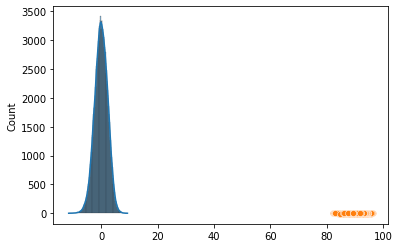

In [22]:
# VARIETY+COUNTRY+PRICE+YEAR
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])
merged_dataframes_total = merged_dataframes_total.dropna(subset=is_year)

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_variety+is_country+is_year+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.
print("residuals: ", residuals.count())
# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor                     features
0   664.662127                        const
1     1.065055                      is Rosé
2     1.080137                    is Merlot
3     1.106923                     is Syrah
4     1.057106                  is Riesling
5     1.105019           is Sauvignon Blanc
6     1.056062  is Bordeaux-style Red Blend
7     1.091128                 is Red Blend
8     1.218895        is Cabernet Sauvignon
9     1.174635                is Chardonnay
10    1.311726                is Pinot Noir
11   14.232071            is North American
12    4.829289            

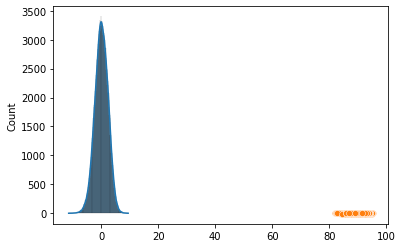

In [26]:
# VARIETY+REGION+PRICE+YEAR
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])
merged_dataframes_total = merged_dataframes_total.dropna(subset=is_year)

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_variety+is_region+is_year+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor         features
0    35.151859            const
1     1.329192       is Germany
2     1.400637       is Austria
3     1.476034     is Australia
4     1.665002     is Argentina
5     1.751612         is Chile
6     1.673790      is Portugal
7     2.039570         is Spain
8     3.179973         is Italy
9     3.090599        is France
10    5.551574            is US
11    1.334248          is Rosé
12    3.777522           is Red
13    3.543446         is White
14    1.318550     is Sparkling
15    1.168338            price
16    1.042199  sentiment_score
                      

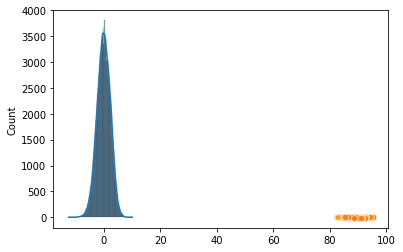

In [24]:
# COUNRTY+COLOR+PRICE
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)
# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_country+is_color+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor                     features
0   612.382039                        const
1     1.062688                      is Rosé
2     1.040112                    is Merlot
3     1.055935                     is Syrah
4     1.052895                  is Riesling
5     1.064122           is Sauvignon Blanc
6     1.055123  is Bordeaux-style Red Blend
7     1.089194                 is Red Blend
8     1.107753        is Cabernet Sauvignon
9     1.107465                is Chardonnay
10    1.189953                is Pinot Noir
11    2.585508                      is 1997
12    4.014660            

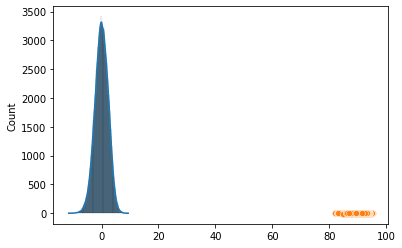

In [27]:
# VARIETY+PRICE+YEAR
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])
merged_dataframes_total = merged_dataframes_total.dropna(subset=is_year)

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_variety+is_year+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor         features
0   630.329579            const
1     1.328735       is Germany
2     1.419057       is Austria
3     1.455412     is Australia
4     1.669924     is Argentina
5     1.762443         is Chile
6     1.694448      is Portugal
7     2.034224         is Spain
8     3.234810         is Italy
9     3.099979        is France
10    5.667354            is US
11    2.584577          is 1997
12    4.014012          is 1998
13    4.418641          is 1999
14    5.131483          is 2000
15    4.787616          is 2001
16    2.784339          is 2002
17    3.752300        

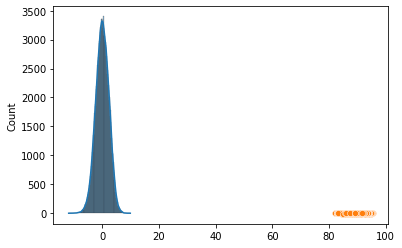

In [28]:
# COUNTRY+PRICE+YEAR
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])
merged_dataframes_total = merged_dataframes_total.dropna(subset=is_year)

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_country+is_year+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor                     features
0    26.377442                        const
1     1.081722                      is Rosé
2     1.088799                    is Merlot
3     1.112983                     is Syrah
4     1.488085                  is Riesling
5     1.136658           is Sauvignon Blanc
6     1.166617  is Bordeaux-style Red Blend
7     1.108519                 is Red Blend
8     1.230747        is Cabernet Sauvignon
9     1.211679                is Chardonnay
10    1.333870                is Pinot Noir
11    1.704405                   is Germany
12    1.432571            

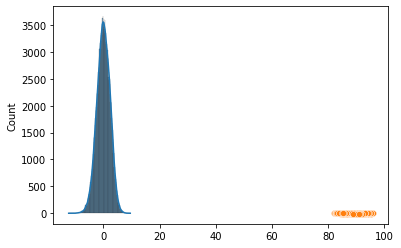

In [25]:
# VARIETY+COUNTRY+PRICE
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_variety+is_country+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor                     features
0     6.835325                        const
1     1.037851                      is Rosé
2     1.037792                    is Merlot
3     1.052041                     is Syrah
4     1.047810                  is Riesling
5     1.059544           is Sauvignon Blanc
6     1.051398  is Bordeaux-style Red Blend
7     1.083495                 is Red Blend
8     1.102558        is Cabernet Sauvignon
9     1.101871                is Chardonnay
10    1.177196                is Pinot Noir
11    1.120138                        price
12    1.009697            

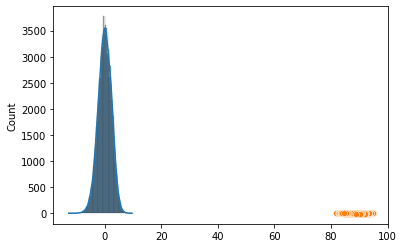

In [29]:
# VARIETY+PRICE
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_variety+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Null Columns 
 price      17112
is 1997    20001
is 1998    20001
is 1999    20001
is 2000    20001
is 2001    20001
is 2002    20001
is 2003    20001
is 2004    20001
is 2005    20001
is 2006    20001
is 2007    20001
is 2008    20001
is 2009    20001
is 2010    20001
is 2011    20001
is 2012    20001
is 2013    20001
is 2014    20001
is 2015    20001
is 2016    20001
is 2017    20001
dtype: int64
    VIF Factor         features
0    23.906374            const
1     1.307107       is Germany
2     1.392801       is Austria
3     1.474113     is Australia
4     1.647736     is Argentina
5     1.739056         is Chile
6     1.663556      is Portugal
7     2.016873         is Spain
8     3.167672         is Italy
9     3.042634        is France
10    5.506704            is US
11    1.080419            price
12    1.037028  sentiment_score
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                     

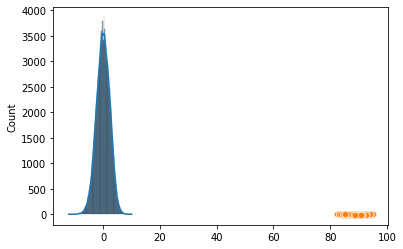

In [30]:
# COUNRTY+PRICE
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

merged_dataframes_total = pd.read_csv('sentimentbinary.csv')

# calculate the interquartile range for the 'price' column
Q1 = merged_dataframes_total['price'].quantile(0.25)
Q3 = merged_dataframes_total['price'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers using the IQR method
outliers = merged_dataframes_total[(merged_dataframes_total['price'] < (Q1 - 1.5 * IQR)) | (merged_dataframes_total['price'] > (Q3 + 1.5 * IQR))]

# drop the outlier rows from the DataFrame
merged_dataframes_total = merged_dataframes_total.drop(outliers.index)

# Check for NaN values in input features
null_columns = merged_dataframes_total.columns[merged_dataframes_total.isnull().any()]
print('Null Columns \n', merged_dataframes_total[null_columns].isnull().sum().head(50))
merged_dataframes_total = merged_dataframes_total.dropna(subset=['price'])

# Separate input features and output variable
X = merged_dataframes_total.loc[:, is_country+['price']+['sentiment_score']]
y = merged_dataframes_total.loc[:, ['points']]

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
# If the histogram looks approximately normally distributed, then the residuals are normally distributed.

# Check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
# If the VIF factor for any of the input variables is greater than 5, then there may be multicollinearity.

# Check for heteroscedasticity
sns.scatterplot(x=model.predict(X), y=residuals)
# If the scatterplot has no discernible pattern, then there is no heteroscedasticity.

# Print the summary of the model
print(model.summary())

# Make predictions
predictions = sm.add_constant(X).dot(coefficients)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R2) value
r2 = r2_score(y, predictions)


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

merged_dataframes_total.info()

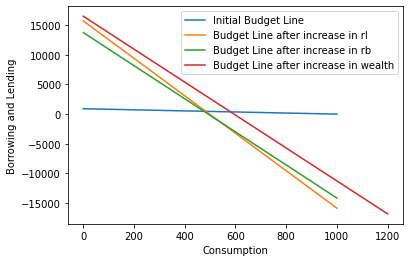

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial parameters
W = 1000     # initial wealth
Pc = 1       # price of consumption goods
Pb = 1.1     # price of borrowed funds
rl = 0.02    # real interest rate earned on funds lent
rb = 0.04    # real interest rate paid to borrow

# Define budget line function
def budget_line(C, rl, rb, W, Pb, Pc):
    B = (W + (Pb - Pc) * C) / (Pb - (1+rl))
    H = (W - (1+rb) * B - Pc * C) / (1+rl)
    return B, H

# Define range of consumption values
C_range = np.linspace(0, 100, 100)

# Plot the initial budget line
plt.plot([0, W/Pc], [W/Pb, 0], label='Initial Budget Line')

# Calculate and plot the budget line after an increase in rl
B_new, H_new = budget_line(W/Pc, rl+0.01, rb, W, Pb, Pc)
plt.plot([0, W/Pc], [B_new, H_new], label='Budget Line after increase in rl')

# Calculate and plot the budget line after an increase in rb
B_new, H_new = budget_line(W/Pc, rl, rb+0.01, W, Pb, Pc)
plt.plot([0, W/Pc], [B_new, H_new], label='Budget Line after increase in rb')

# Calculate and plot the budget line after an increase in wealth
B_new, H_new = budget_line(W/Pc+200, rl, rb, W+200*Pc, Pb, Pc)
plt.plot([0, (W+200*Pc)/Pc], [B_new, H_new], label='Budget Line after increase in wealth')

# Add labels and legend
plt.xlabel('Consumption')
plt.ylabel('Borrowing and Lending')
plt.legend()

# Show the plot
plt.show()

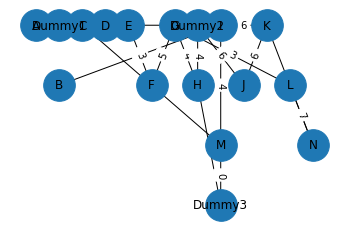

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# create a directed graph
G = nx.DiGraph()

# add nodes with their corresponding durations
G.add_node('A', duration=10)
G.add_node('B', duration=3)
G.add_node('C', duration=1)
G.add_node('D', duration=2)
G.add_node('E', duration=7)
G.add_node('F', duration=3)
G.add_node('G', duration=5)
G.add_node('H', duration=4)
G.add_node('I', duration=3)
G.add_node('J', duration=6)
G.add_node('K', duration=6)
G.add_node('L', duration=3)
G.add_node('M', duration=4)
G.add_node('N', duration=7)
G.add_node('Dummy1', duration=0)
G.add_node('Dummy2', duration=0)
G.add_node('Dummy3', duration=0)

# add edges between the nodes
G.add_edge('D', 'E')
G.add_edge('E', 'F')
G.add_edge('F', 'G')
G.add_edge('A', 'Dummy1')
G.add_edge('Dummy1', 'G')
G.add_edge('G', 'H')
G.add_edge('B', 'I')
G.add_edge('Dummy2', 'H')
G.add_edge('Dummy2', 'J')
G.add_edge('I', 'Dummy2')
G.add_edge('J', 'K')
G.add_edge('I', 'K')
G.add_edge('G', 'L')
G.add_edge('C', 'M')
G.add_edge('I', 'M')
G.add_edge('K', 'N')
G.add_edge('L', 'N')
G.add_edge('H', 'Dummy3')
G.add_edge('M', 'Dummy3')

# set positions for the nodes
pos = {
    'A': (0, 0),
    'B': (2, -1),
    'C': (4, 0),
    'D': (6, 0),
    'E': (8, 0),
    'F': (10, -1),
    'G': (12, 0),
    'H': (14, -1),
    'I': (16, 0),
    'J': (18, -1),
    'K': (20, 0),
    'L': (22, -1),
    'M': (16, -2),
    'N': (24, -2),
    'Dummy1': (2, 0),
    'Dummy2': (14, 0),
    'Dummy3': (16, -3)
}

# draw the graph
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G.nodes[v]['duration'] for u, v in G.edges})
plt.axis('off')
plt.show()

KeyError: KeyError: 'duration'

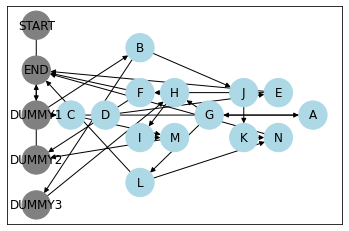

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph object
G = nx.DiGraph()

# Add nodes
G.add_node('A', duration=10)
G.add_node('B', duration=3)
G.add_node('C', duration=1)
G.add_node('D', duration=2)
G.add_node('E', duration=7)
G.add_node('F', duration=3)
G.add_node('G', duration=5)
G.add_node('H', duration=4)
G.add_node('I', duration=3)
G.add_node('J', duration=6)
G.add_node('K', duration=6)
G.add_node('L', duration=3)
G.add_node('M', duration=4)
G.add_node('N', duration=7)
G.add_node('START', duration=0)
G.add_node('END', duration=0)
G.add_node('DUMMY1', duration=0)
G.add_node('DUMMY2', duration=0)
G.add_node('DUMMY3', duration=0)

# Add edges
G.add_edge('DUMMY1', 'A', duration=0)
G.add_edge('DUMMY1', 'B', duration=0)
G.add_edge('DUMMY1', 'C', duration=0)
G.add_edge('A', 'G')
G.add_edge('D', 'E')
G.add_edge('E', 'F')
G.add_edge('F', 'DUMMY2', duration=0)
G.add_edge('B', 'DUMMY3', duration=0)
G.add_edge('DUMMY3', 'H')
G.add_edge('H', 'I')
G.add_edge('B', 'J')
G.add_edge('J', 'K')
G.add_edge('K', 'N')
G.add_edge('L', 'N')
G.add_edge('G', 'L')
G.add_edge('I', 'M')
G.add_edge('C', 'M')
G.add_edge('M', 'DUMMY2', duration=0)
G.add_edge('G', 'H')
G.add_edge('START', 'DUMMY1', duration=0)
G.add_edge('DUMMY2', 'END', duration=0)
G.add_edge('N', 'END', duration=0)
G.add_edge('E', 'END', duration=0)
G.add_edge('F', 'END', duration=0)
G.add_edge('L', 'END', duration=0)

# Set positions for nodes
pos = nx.multipartite_layout(G, subset_key="duration")

# Set node colors
colors = ['grey' if n in ['START', 'END', 'DUMMY1', 'DUMMY2', 'DUMMY3'] else 'lightblue' for n in G.nodes()]

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_color=colors, node_size=800)

# Set edge labels
edge_labels = {(u, v): G.edges[u, v]['duration'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()